In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
15205,-117.07,33.01,5.0,5870.0,977.0,1917.0,842.0,5.1998,294100.0,<1H OCEAN
15206,-117.06,33.01,9.0,2470.0,417.0,904.0,427.0,4.4219,209200.0,<1H OCEAN
15207,-117.07,33.00,4.0,6242.0,1258.0,2211.0,1116.0,4.2500,281600.0,<1H OCEAN
15208,-117.07,33.00,4.0,9153.0,1866.0,3775.0,1698.0,4.9550,241500.0,<1H OCEAN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15210 entries, 0 to 15209
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15210 non-null  float64
 1   latitude            15210 non-null  float64
 2   housing_median_age  15210 non-null  float64
 3   total_rooms         15210 non-null  float64
 4   total_bedrooms      15062 non-null  float64
 5   population          15210 non-null  float64
 6   households          15210 non-null  float64
 7   median_income       15210 non-null  float64
 8   median_house_value  15210 non-null  float64
 9   ocean_proximity     15209 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.2+ MB


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15061 entries, 0 to 15208
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           15061 non-null  float64
 1   latitude            15061 non-null  float64
 2   housing_median_age  15061 non-null  float64
 3   total_rooms         15061 non-null  float64
 4   total_bedrooms      15061 non-null  float64
 5   population          15061 non-null  float64
 6   households          15061 non-null  float64
 7   median_income       15061 non-null  float64
 8   median_house_value  15061 non-null  float64
 9   ocean_proximity     15061 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [7]:
from sklearn.model_selection import train_test_split

x=df.drop(['median_house_value'],axis=1)
y=df['median_house_value']

In [8]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
15204,-117.08,32.91,9.0,1547.0,218.0,683.0,231.0,7.5604,<1H OCEAN
15205,-117.07,33.01,5.0,5870.0,977.0,1917.0,842.0,5.1998,<1H OCEAN
15206,-117.06,33.01,9.0,2470.0,417.0,904.0,427.0,4.4219,<1H OCEAN
15207,-117.07,33.00,4.0,6242.0,1258.0,2211.0,1116.0,4.2500,<1H OCEAN


In [9]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
15204    327900.0
15205    294100.0
15206    209200.0
15207    281600.0
15208    241500.0
Name: median_house_value, Length: 15061, dtype: float64

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [11]:
train_df=x_train.join(y_train)

In [12]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
5433,-118.41,34.02,27.0,2224.0,618.0,1594.0,625.0,3.0833,<1H OCEAN,315500.0
7258,-118.16,34.01,36.0,931.0,246.0,732.0,235.0,1.7679,<1H OCEAN,142800.0
10295,-117.81,33.86,18.0,133.0,29.0,95.0,23.0,3.5625,<1H OCEAN,235000.0
10119,-117.92,33.94,30.0,2506.0,394.0,1255.0,421.0,4.7813,<1H OCEAN,198200.0
6592,-118.20,34.19,38.0,2176.0,266.0,798.0,243.0,15.0001,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
1237,-120.37,38.25,13.0,4495.0,856.0,1149.0,459.0,2.5352,INLAND,113700.0
11193,-117.92,33.84,38.0,1316.0,263.0,671.0,278.0,3.2969,<1H OCEAN,220000.0
10875,-117.89,33.72,23.0,2305.0,538.0,2493.0,502.0,3.6618,<1H OCEAN,183500.0
7355,-118.17,33.96,25.0,2249.0,681.0,2621.0,628.0,2.3000,<1H OCEAN,164200.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

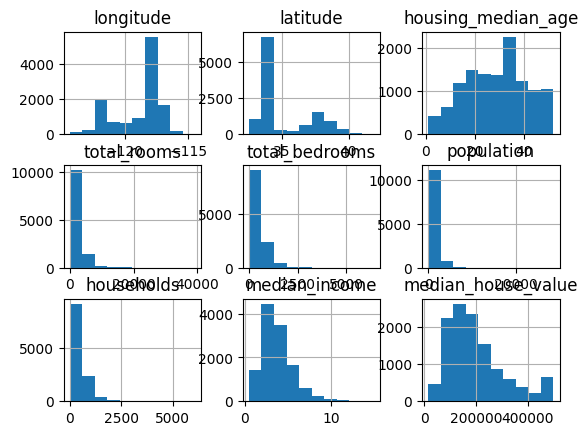

In [13]:
train_df.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

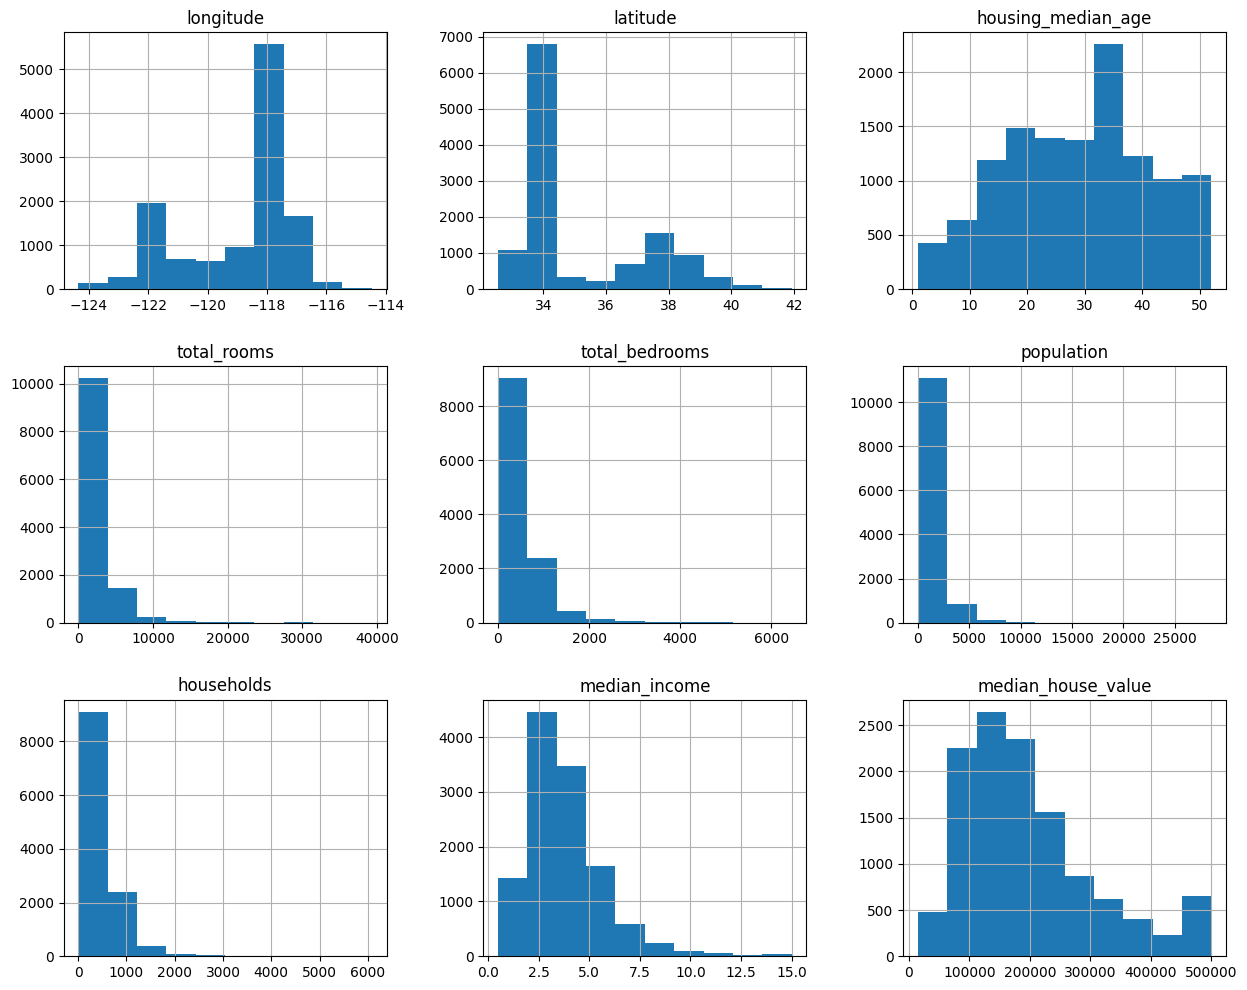

In [14]:
train_df.hist(figsize=(15,12))

In [15]:
train_df.corr()

<ipython-input-15-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.930995,-0.084368,0.030864,0.061013,0.094830,0.049916,0.042685,0.083596
latitude,-0.930995,1.000000,-0.030332,-0.008827,-0.047492,-0.097438,-0.057081,-0.111261,-0.231913
housing_median_age,-0.084368,-0.030332,1.000000,-0.380124,-0.348958,-0.311823,-0.327460,-0.131391,0.063840
total_rooms,0.030864,-0.008827,-0.380124,1.000000,0.928642,0.857802,0.913866,0.213104,0.141069
total_bedrooms,0.061013,-0.047492,-0.348958,0.928642,1.000000,0.882895,0.978057,0.003597,0.052260
population,0.094830,-0.097438,-0.311823,0.857802,0.882895,1.000000,0.914027,0.007388,-0.022012
households,0.049916,-0.057081,-0.327460,0.913866,0.978057,0.914027,1.000000,0.022998,0.068275
median_income,0.042685,-0.111261,-0.131391,0.213104,0.003597,0.007388,0.022998,1.000000,0.699715
median_house_value,0.083596,-0.231913,0.063840,0.141069,0.052260,-0.022012,0.068275,0.699715,1.000000


<ipython-input-16-ee9747522c54>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")


<Axes: >

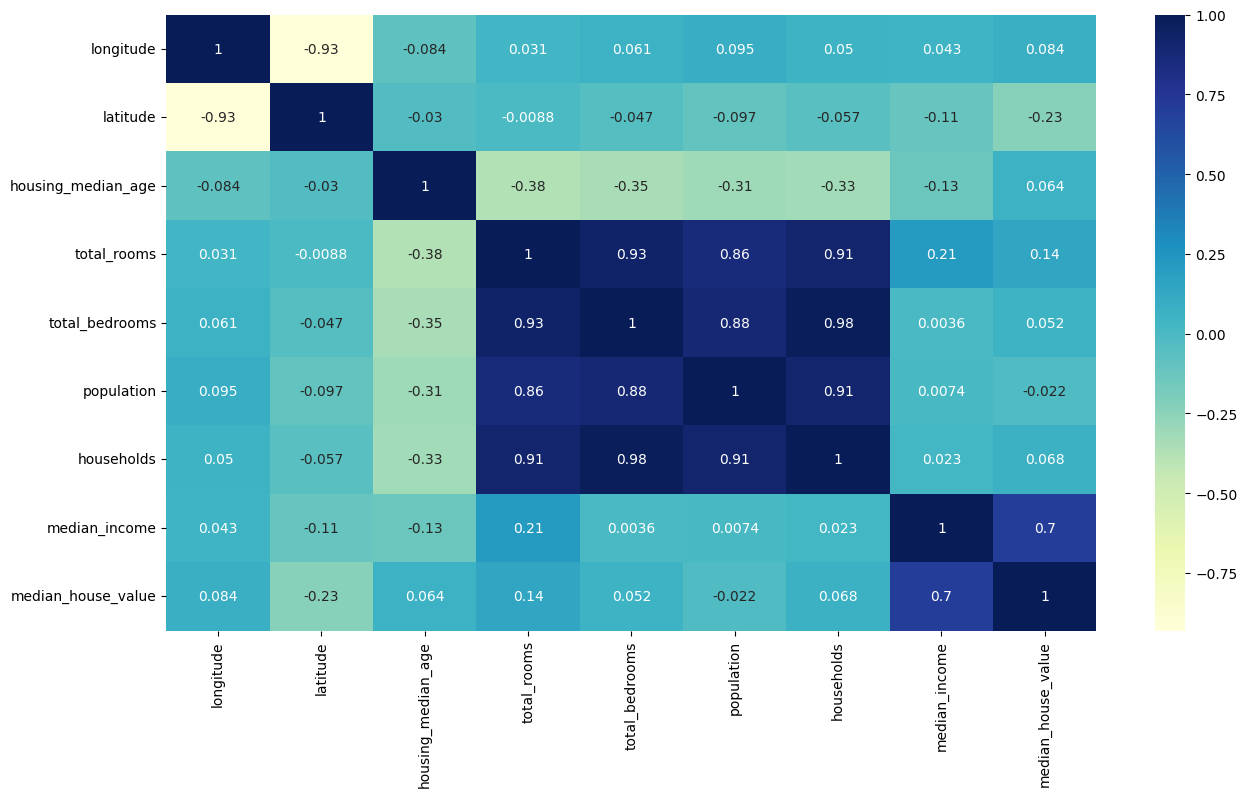

In [16]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")

In [17]:
train_df['total_rooms']=np.log(train_df['total_rooms']+1)
train_df['total_bedrooms']=np.log(train_df['total_bedrooms']+1)
train_df['population']=np.log(train_df['population']+1)
train_df['households']=np.log(train_df['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

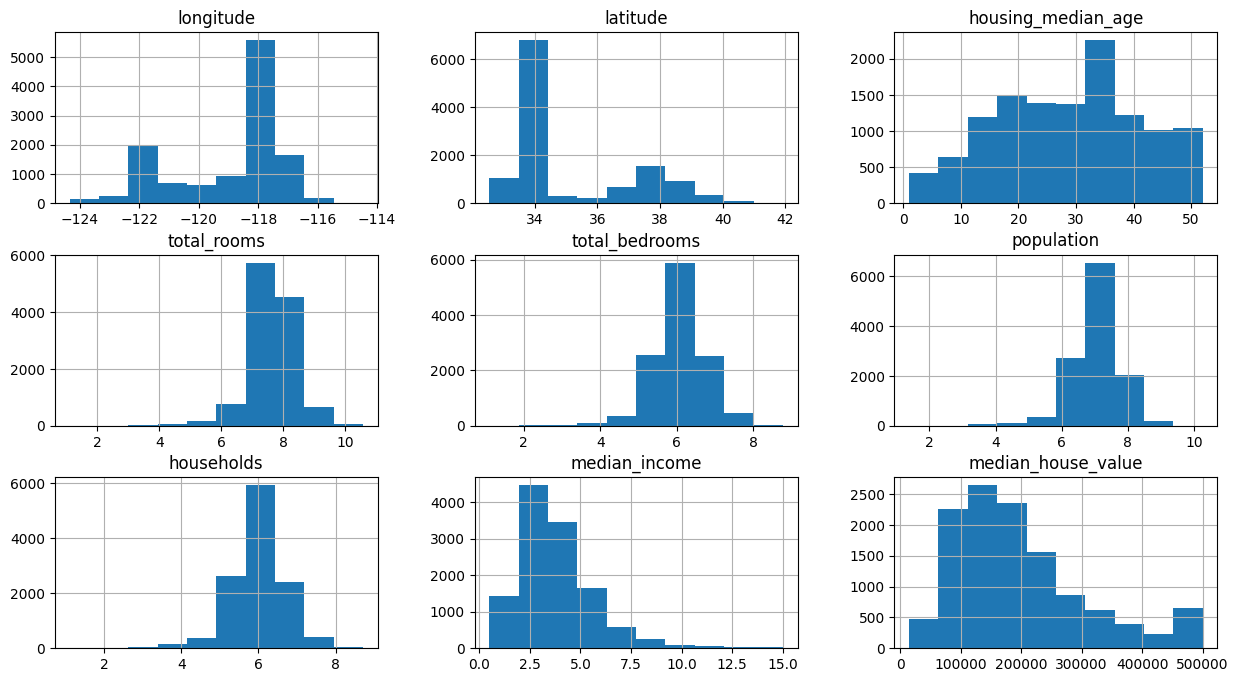

In [18]:
train_df.hist(figsize=(15,8))

In [19]:

train_df.ocean_proximity.value_counts()

<1H OCEAN     5790
INLAND        3898
NEAR BAY      1195
NEAR OCEAN    1162
ISLAND           3
Name: ocean_proximity, dtype: int64

In [20]:
train_df=train_df.join(pd.get_dummies(train_df.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [21]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5433,-118.41,34.02,27.0,7.707512,6.428105,7.374629,6.439350,3.0833,315500.0,1,0,0,0,0
7258,-118.16,34.01,36.0,6.837333,5.509388,6.597146,5.463832,1.7679,142800.0,1,0,0,0,0
10295,-117.81,33.86,18.0,4.897840,3.401197,4.564348,3.178054,3.5625,235000.0,1,0,0,0,0
10119,-117.92,33.94,30.0,7.826842,5.978886,7.135687,6.045005,4.7813,198200.0,1,0,0,0,0
6592,-118.20,34.19,38.0,7.685703,5.587249,6.683361,5.497168,15.0001,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,-120.37,38.25,13.0,8.410943,6.753438,7.047517,6.131226,2.5352,113700.0,0,1,0,0,0
11193,-117.92,33.84,38.0,7.183112,5.575949,6.510258,5.631212,3.2969,220000.0,1,0,0,0,0
10875,-117.89,33.72,23.0,7.743270,6.289716,7.821643,6.220590,3.6618,183500.0,1,0,0,0,0
7355,-118.17,33.96,25.0,7.718685,6.525030,7.871693,6.444131,2.3000,164200.0,1,0,0,0,0


<Axes: >

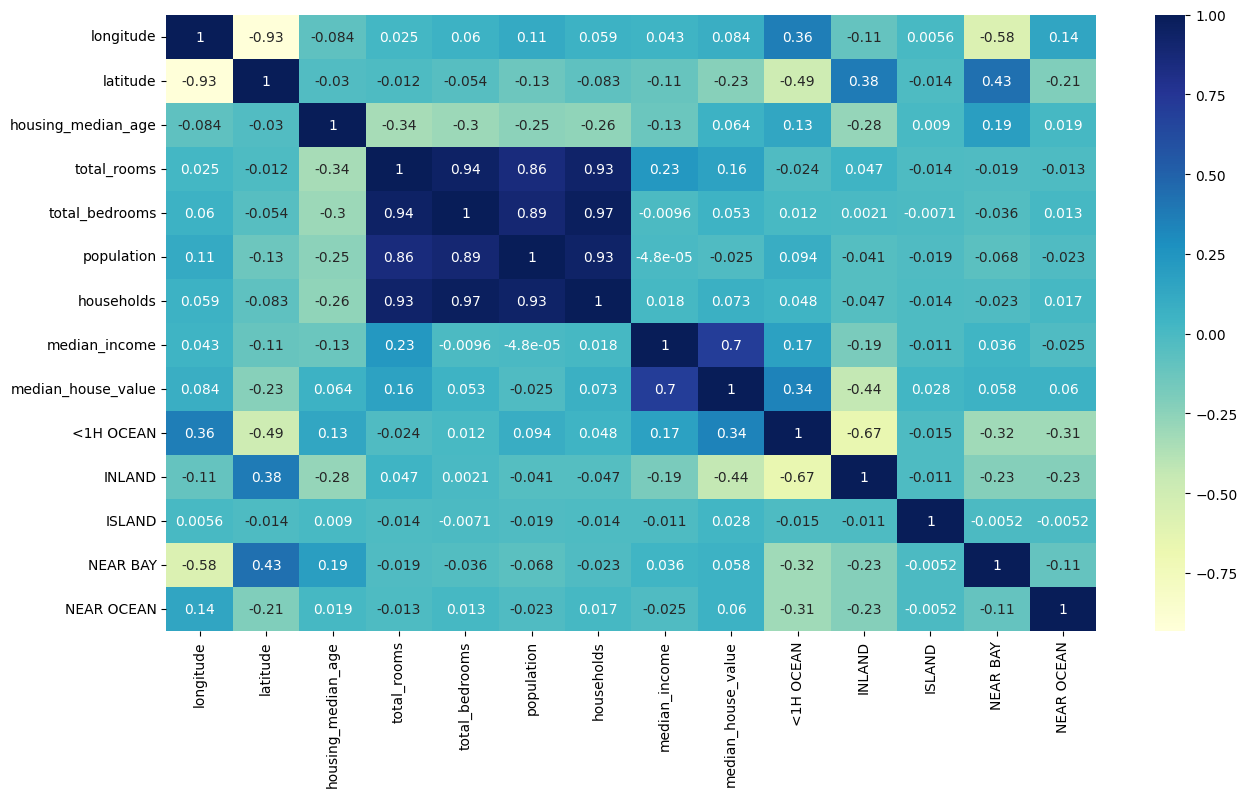

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

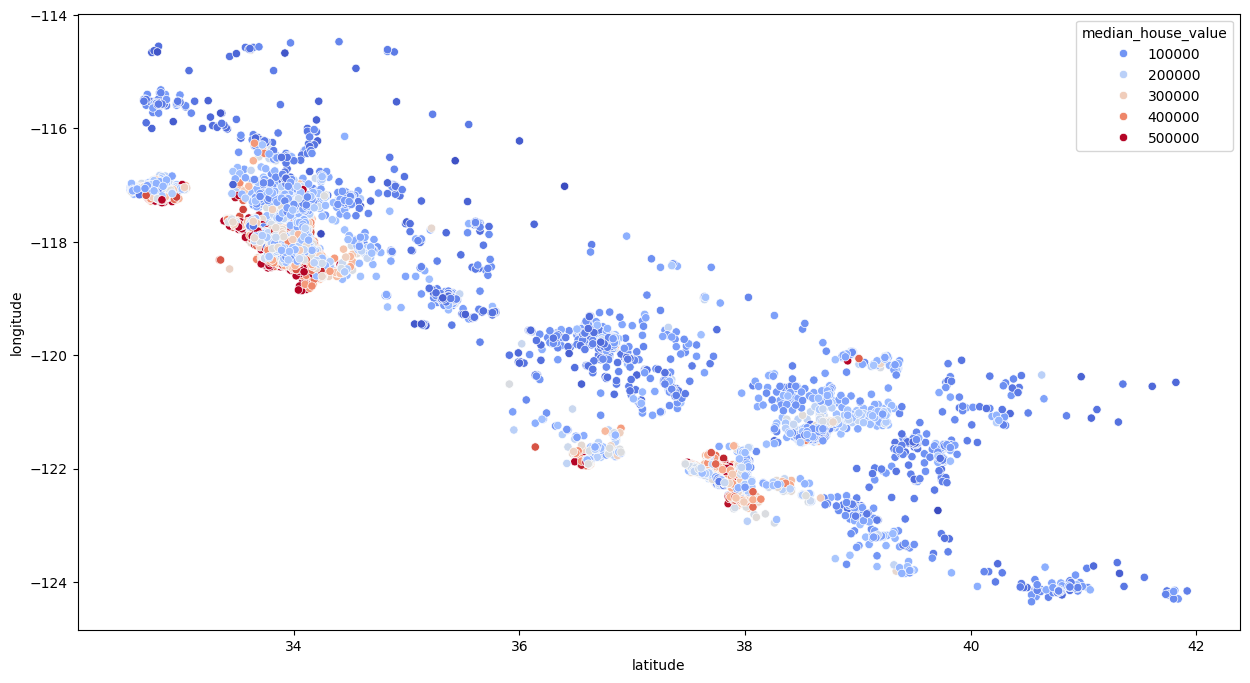

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude',y='longitude',data=train_df,hue='median_house_value',palette='coolwarm')

In [24]:
train_df['bedroom_ratio']=train_df['total_bedrooms']/train_df['total_rooms']
train_df['household_rooms']=train_df['total_rooms']/train_df['households']

<Axes: >

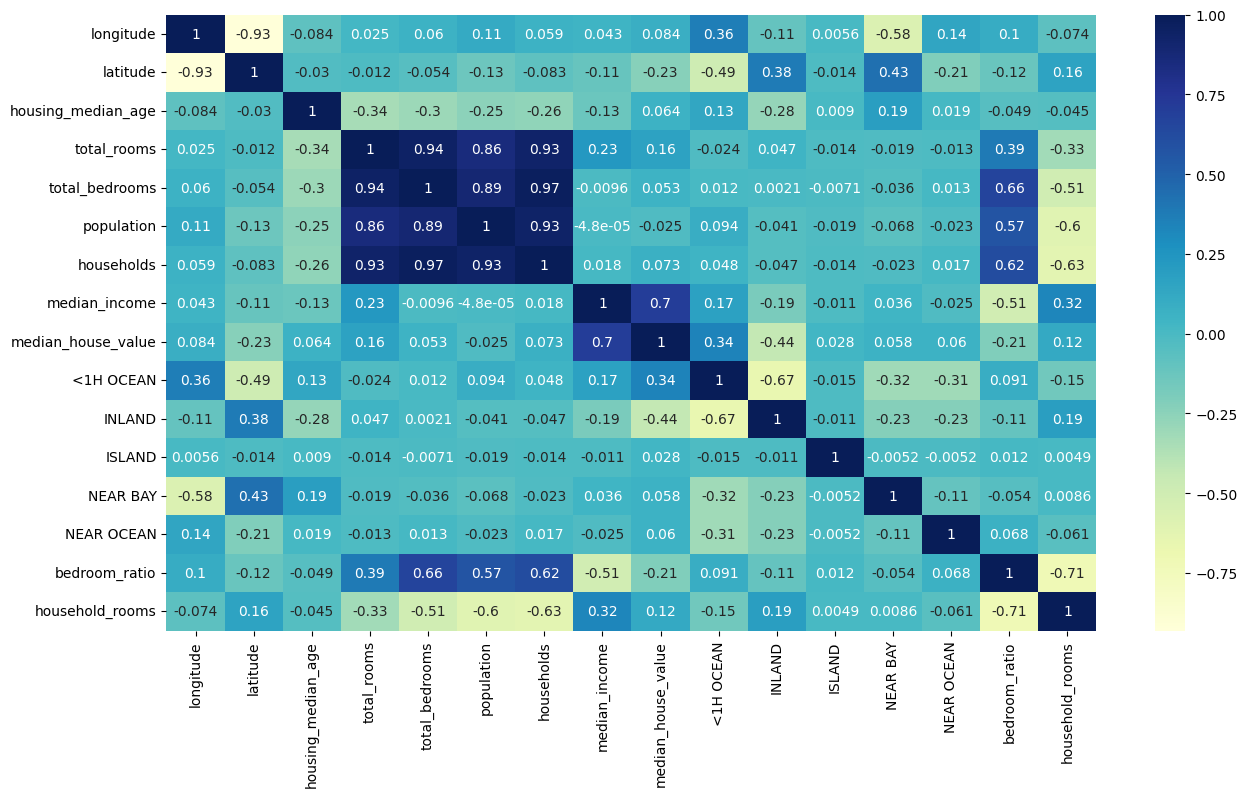

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")

In [39]:
#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x_train,y_train=train_df.drop(['median_house_value'],axis=1),train_df['median_house_value']

x_train_s=scaler.fit_transform(x_train)
reg=LinearRegression()
reg.fit(x_train_s,y_train)

LinearRegression()

In [40]:
test_df=x_test.join(y_test)

test_df['total_rooms']=np.log(test_df['total_rooms']+1)
test_df['total_bedrooms']=np.log(test_df['total_bedrooms']+1)
test_df['population']=np.log(test_df['population']+1)
test_df['households']=np.log(test_df['households']+1)


test_df=test_df.join(pd.get_dummies(test_df.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_df['bedroom_ratio']=test_df['total_bedrooms']/test_df['total_rooms']
test_df['household_rooms']=test_df['total_rooms']/test_df['households']



AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [30]:
x_test,y_test=test_df.drop(['median_house_value'],axis=1),test_df['median_house_value']

In [41]:
x_test_s=scaler.transform(x_test)

In [42]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms,median_house_value
2114,-119.75,36.76,32.0,2.156027,1.975552,2.152041,1.967792,1.3278,0,1,0,0,0,0.813251,1.240768,44500.0
5963,-117.85,34.11,25.0,2.315800,2.129965,2.251937,2.127649,4.5708,0,1,0,0,0,0.811842,1.235009,223000.0
3211,-119.66,36.34,32.0,2.104095,1.890702,2.048587,1.896042,2.6397,0,1,0,0,0,0.781148,1.272144,59700.0
12054,-117.57,33.88,35.0,2.136624,1.960455,2.114093,1.954651,2.3160,0,1,0,0,0,0.816855,1.232508,119400.0
2500,-120.38,36.75,25.0,2.132091,1.974994,2.135950,1.963872,1.9056,0,1,0,0,0,0.835061,1.213097,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13692,-117.24,34.13,26.0,2.223126,2.024863,2.146744,2.005705,3.3534,0,1,0,0,0,0.798319,1.280630,98900.0
15187,-117.05,33.04,12.0,2.142189,1.878130,1.996705,1.865565,6.7769,1,0,0,0,0,0.737060,1.377039,400000.0
12815,-121.50,38.61,5.0,2.109166,1.935031,2.009543,1.913631,2.6745,0,1,0,0,0,0.818113,1.253341,225000.0
1988,-119.81,36.74,36.0,2.002854,1.800034,1.971590,1.790164,1.5625,0,1,0,0,0,0.787788,1.284493,47500.0


In [44]:
reg.score(x_test_s,y_test)

0.6666492914947371

In [49]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

# Fit the model with training data
forest.fit(x_train, y_train)

RandomForestRegressor()

In [50]:
forest.score(x_test,y_test)

0.8262876395186066

In [51]:


from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

# Fit the model with training data
forest.fit(x_train_s, y_train)



RandomForestRegressor()

In [53]:
forest.score(x_test_s,y_test)

0.8254754808730487

In [59]:
#Cross validation (k-folds)

from sklearn.model_selection import GridSearchCV

forest= RandomForestRegressor()

param_grid={
    "n_estimators":[30,50,100],
    "max_features":[8,12,20],
    }

grid_search= GridSearchCV(forest,param_grid,cv=5,scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(x_train_s,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
best_forest=grid_search.best_estimator_

In [61]:
best_forest.score(x_test_s,y_test)

0.8250830023005995